# Building Probability Logic For A Lottery Addiction Application
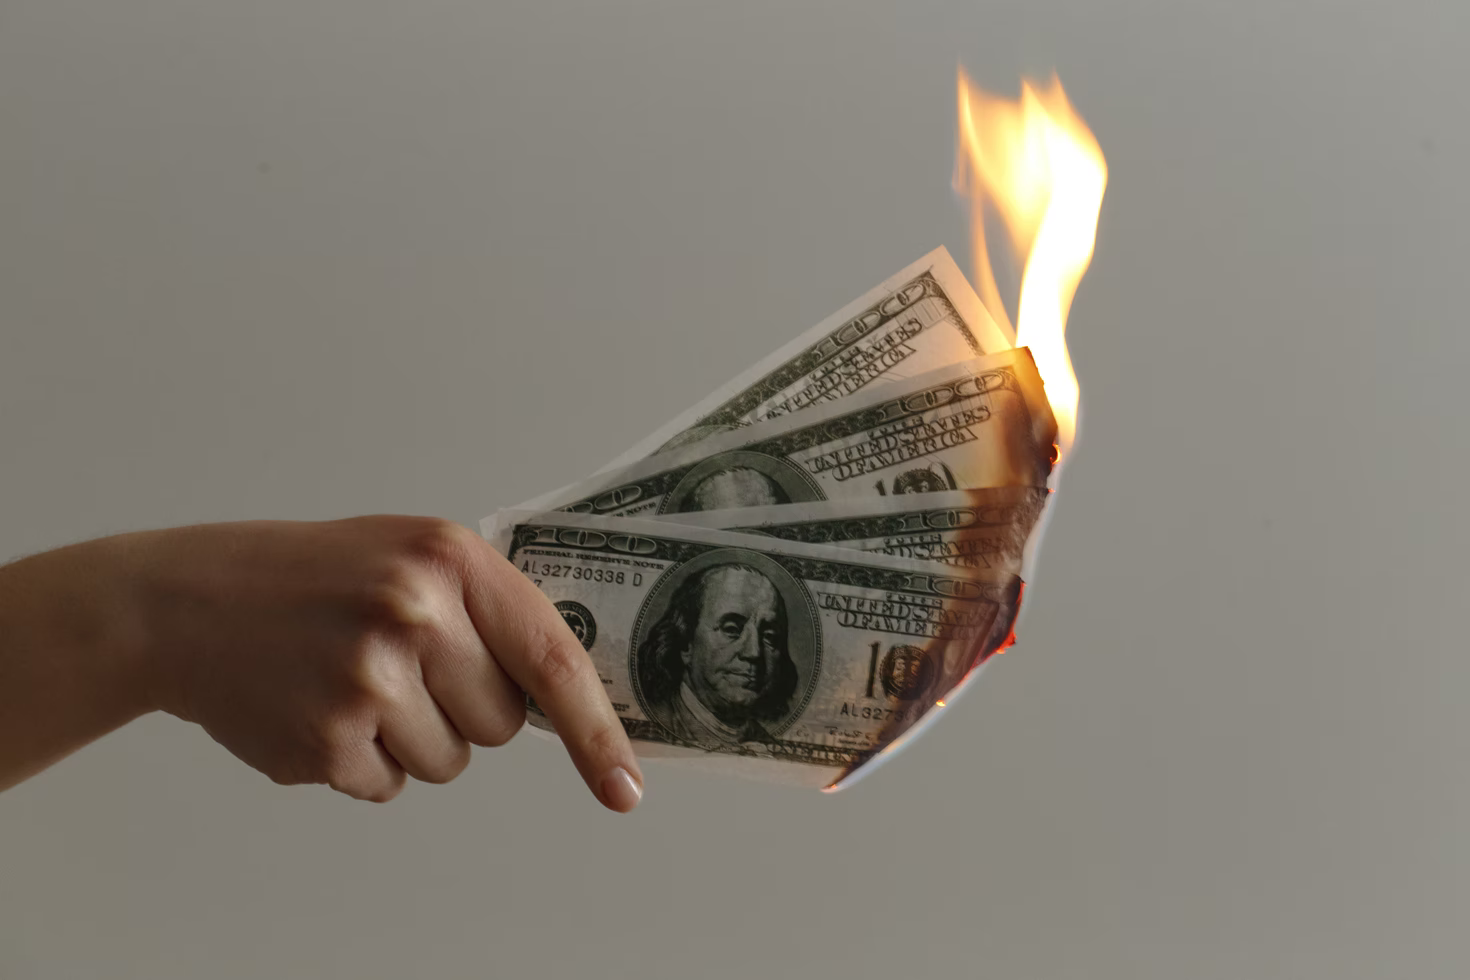

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1">Introduction</a></span><ul class="toc-item"><li><span><a href="#Results" data-toc-modified-id="Results-1.1">Results</a></span></li></ul></li><li><span><a href="#Creating-Probability-Functions" data-toc-modified-id="Creating-Probability-Functions-2">Creating Probability Functions</a></span></li><li><span><a href="#Probability-of-Winning-The-Grand-Prize" data-toc-modified-id="Probability-of-Winning-The-Grand-Prize-3">Probability of Winning The Grand Prize</a></span></li><li><span><a href="#Historical-Winnings-With-A-Given-Number" data-toc-modified-id="Historical-Winnings-With-A-Given-Number-4">Historical Winnings With A Given Number</a></span><ul class="toc-item"><li><span><a href="#Data-Exploration" data-toc-modified-id="Data-Exploration-4.1">Data Exploration</a></span></li><li><span><a href="#Function-Showing-How-Often-Numbers-Are-Drawn" data-toc-modified-id="Function-Showing-How-Often-Numbers-Are-Drawn-4.2">Function Showing How Often Numbers Are Drawn</a></span></li></ul></li><li><span><a href="#Probability-of-Winning-with-Multiple-Tickets" data-toc-modified-id="Probability-of-Winning-with-Multiple-Tickets-5">Probability of Winning with Multiple Tickets</a></span></li><li><span><a href="#Probability-of-Getting-Fewer-than-6-Winning-Numbers" data-toc-modified-id="Probability-of-Getting-Fewer-than-6-Winning-Numbers-6">Probability of Getting Fewer than 6 Winning Numbers</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-7">Conclusion</a></span><ul class="toc-item"><li><span><a href="#The-Product" data-toc-modified-id="The-Product-7.1">The Product</a></span></li><li><span><a href="#Insights-on-Probability-of-Winning-the-Lottery" data-toc-modified-id="Insights-on-Probability-of-Winning-the-Lottery-7.2">Insights on Probability of Winning the Lottery</a></span></li><li><span><a href="#Possible-Features-for-Next-Versions" data-toc-modified-id="Possible-Features-for-Next-Versions-7.3">Possible Features for Next Versions</a></span><ul class="toc-item"><li><span><a href="#Features-to-Avoid" data-toc-modified-id="Features-to-Avoid-7.3.1">Features to Avoid</a></span></li></ul></li></ul></li></ul></div>

## Introduction
In this project we are a part of a software development team that is building an app in cohort with a medical institute to help people with gambling addiction better understand their chances of winning the lottery. Our role on the team is to provide the software engineers with the logical core of the app that will predict the probabilities of the lottery scenarios.

For the first version of the app, they want us to focus on the [6/49 lottery](https://en.wikipedia.org/wiki/Lotto_6/49) and build functions that enable users to answer questions like:
* What is the probability of winning the big prize with a single ticket?
* What is the probability of winning the big prize if we play 40 different tickets (or any other number of tickets)?
* What is the probability of having at least five (or four, or three, or two) winning numbers on a single ticket?

The institute also wants us to consider historical data coming from the national 6/49 lottery in Canada. That data can be downloaded [here](https://www.kaggle.com/datascienceai/lottery-dataset). Their desire is for users to be able to compare their ticket against the historical lottery data in Canada and determine whether they would have ever won. 

### Results
This project produced functions to spec of the software engineering team. Through the creation of these functions we demonstrated how slim the likelihood of winning the lottery is regardless of how a person plays it. Optional features and how to use them are outlined below. Future feature recommendations can be found in this project's conclusion. Those interested in the mathmatics used in the functions created can find those explained below. 

## Creating Probability Functions
Our first task is to create the logical core for our app. Rather than creating the probability logic over and over as we need them, it will be more efficient to create flexible functions that we only have to build once. 

There are many ways to win the 6/49 lottery, but at its most basic level the goal is to match a certain amount of numbers from those that you picked to those that are drawn. The order in which the numbers are drawn or picked do not matter. To find the probability of winning, we can use the theoretical probability formula:

\begin{equation*}
\ P(E) = \frac{number\ of\ successful\ outcomes}{total\ number\ of\ possible\ outcomes}
\end{equation*}


To find the total number of possible outcomes, we should ask: how many different combinations of 6 numbers can we build out of 49 numbers? To find this, we will use the combinations function, which says to find the number of combinations when we're sampling without replacement and taking only k objects from a group of n objects, we can use the below formula:

\begin{equation*}
\ Total\ Number\ of\ Possible\ Combinations\ =\ _nC_k = {n \choose k} = \frac{n!}{k!(n-k)!}
\end{equation*}

To build this formula, we will need to understand some notation. The expression n! is called a factorial and is read as "n factorial". Below is the notation we can use when running factorials.
\begin{equation*}
\ Factorial = n! = n\cdot(n-1)\cdot(n-2)\cdot ... \cdot2\cdot1  
\end{equation*}
\begin{equation*}
\ Example: 3! = 3\cdot2\cdot1 = 6
\end{equation*}

Let's build out these functions in Python now.

In [1]:
def factorial(n):
    final_product = 1
    for i in range(n, 0, -1): # i will equal n in first iteration, then it will decrease by -1 until it reaches 1
        final_product *= i
    return final_product

def combinations(n,k):
    numerator = factorial(n)
    denominator = (factorial(k)*(factorial(n-k)))
    return numerator / denominator

## Probability of Winning The Grand Prize
In the 6/49 lottery, six numbers are drawn from a set of 49 numbers ranging from 1-49. A player wins the big prize if the six numbers on their ticket match all the six numbers drawn.  

Considering this probability function within the parameters of this lottery system, when we choose any 6 numbers, the number of successful outcomes for us to win the grand prize is one, exactly our set of numbers. Rewriting our probability formula we get:

\begin{equation*}
\ P(E) = \frac{1}{total\ number\ of\ possible\ outcomes}  = \frac{1}{\frac{n!}{k!(n-k)!}}
\end{equation*}

For the first version of the app, we want players to be able to calculate the probability of winning the big prize with the various numbers they play on a single ticket. So we'll start by building a function that calculates the probability of winning the big prize for any given ticket.  

We discussed with the engineering team of the medical institute, and they told us we need to be aware of the following details when we write the function:
* Inside the app, the user inputs six different numbers from 1 to 49.
* Under the hood, the six numbers will come as a Python list, which will serve as the single input to our function.
* The engineering team wants the function to print the probability value in a friendly way - in a way that people without any probability training are able to understand.

With these parameters in mind, let's build our function.

In [2]:
# function that takes a list of six numbers and returns the probability of those numbers winning/losing
def one_ticket_probability(ls_six_numbers, winning=True, validation = False):
    # optional entry validation
    if validation: 
        if type(ls_six_numbers) is not list:
            return print('Must enter a list of six integers.')
        if len(ls_six_numbers) != 6:
            return print('List must have six numbers of values equal to 1 and 49.')
        if len(ls_six_numbers) != len(set(ls_six_numbers)):
            return print('List can not contain duplicates.')
    
    # total possible cominations
    choose = len(ls_six_numbers)
    successful_outcomes = 1
    total_possible_outcomes = combinations(49, choose)
    
    # probability
    probability = successful_outcomes / total_possible_outcomes
    probability_losing = 1 - probability
    
    # output message
    if winning:
        message = "These numbers have a {:.8%} chance of winning.".format(probability)
    else:
        message = "These numbers have a {:.8%} chance of losing.".format(probability_losing)
    
    return print(message)

To demonstrate this function will output the same probability for any list of numbers in the range, we will randomize the input of the function. The below cells can be run as many times as you like. Each time you will get a new list of numbers of random numbers and the same probability of hitting the Jackpot.

In [3]:
import random 
# generate a list of 
numbers = random.sample(range(1,50),6)
print(numbers)

[28, 8, 26, 34, 44, 11]


In [4]:
one_ticket_probability(numbers)

These numbers have a 0.00000715% chance of winning.


In [5]:
one_ticket_probability(numbers, winning = False)

These numbers have a 99.99999285% chance of losing.


Within our function we created the optional parameter _winning_. By default, winning is set to True, so the developers will not need to interact with this parameter unless they want to. Switching the parameter from True to False changes how the output is framed. By default the parameter shows the probability of winning the Jackpot with the chosen numbers, however if toggled to False the probability of losing is shown. It can often be more impactful if things are framed negatively, especially when the desired behavior is for whoever is reading the message is to not to do something.

One other feature we added is entry validation. Even though the numbers chosen don't really play a factor each time we calculate the probability of winning the jackpot with a single ticket, failing to enter the correct inputs can lead to confusion or a bad user experience. We've added optional validation parameters to every function we created in this project and leave it to the discretion of the engineering team if they want to use our entry validation system.

## Historical Winnings With A Given Number
Another feature of the application is for users to have the capability to check whether the numbers that they have chosen have ever won in past drawings. We have the historical dataset of lottery winnings at our disposal, so let's build out this feature.

### Data Exploration

In [6]:
# read in our data
import pandas as pd
lottery = pd.read_csv("649.csv")
# show the first rows of data
lottery.head()

,PRODUCT,DRAW NUMBER,SEQUENCE NUMBER,DRAW DATE,NUMBER DRAWN 1,NUMBER DRAWN 2,NUMBER DRAWN 3,NUMBER DRAWN 4,NUMBER DRAWN 5,NUMBER DRAWN 6,BONUS NUMBER
0,649,1,0,6/12/1982,3,11,12,14,41,43,13
1,649,2,0,6/19/1982,8,33,36,37,39,41,9
2,649,3,0,6/26/1982,1,6,23,24,27,39,34
3,649,4,0,7/3/1982,3,9,10,13,20,43,34
4,649,5,0,7/10/1982,5,14,21,31,34,47,45


In [7]:
# show the last rows of data
lottery.tail()

,PRODUCT,DRAW NUMBER,SEQUENCE NUMBER,DRAW DATE,NUMBER DRAWN 1,NUMBER DRAWN 2,NUMBER DRAWN 3,NUMBER DRAWN 4,NUMBER DRAWN 5,NUMBER DRAWN 6,BONUS NUMBER
3660,649,3587,0,6/6/2018,10,15,23,38,40,41,35
3661,649,3588,0,6/9/2018,19,25,31,36,46,47,26
3662,649,3589,0,6/13/2018,6,22,24,31,32,34,16
3663,649,3590,0,6/16/2018,2,15,21,31,38,49,8
3664,649,3591,0,6/20/2018,14,24,31,35,37,48,17


In [8]:
lottery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   PRODUCT          3665 non-null   int64 
 1   DRAW NUMBER      3665 non-null   int64 
 2   SEQUENCE NUMBER  3665 non-null   int64 
 3   DRAW DATE        3665 non-null   object
 4   NUMBER DRAWN 1   3665 non-null   int64 
 5   NUMBER DRAWN 2   3665 non-null   int64 
 6   NUMBER DRAWN 3   3665 non-null   int64 
 7   NUMBER DRAWN 4   3665 non-null   int64 
 8   NUMBER DRAWN 5   3665 non-null   int64 
 9   NUMBER DRAWN 6   3665 non-null   int64 
 10  BONUS NUMBER     3665 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 315.1+ KB


There are 11 columns and 3664 rows of lottery data. 10 of the 11 columns are integer data types and the last is a string type object that represents the date the numbers were drawn. There is no missing data in the dataset.

The most important columns for our purposes will be the last seven. Six of these seven represent the numbers needed in order to win the Jackpot and the last is the bonus number, which is required to win some sub-prizes but not the jackpot. In this initial release, we will not be considering the Bonus Ball.

### Function Showing How Often Numbers Are Drawn
Now we will write a function that will enable users to compare their tickets against the historical lottery data in Canada and determine whether they would have won by now if they had been consistenly playing with these numbers. 

The engineering team told us that we need to be aware of the following details:
* Inside the app, the user inputs six different numbers from 1 to 49.
* Under the hood, the six numbers will come as a Python list and serve as an input to our function.
* The engineering team wants us to write a function that prints:
  * the number of times the combination selected occurred in the Canada data set; and
  * the probability of winning the big prize in the next drawing with that combination.
  
Let's build that function now.

First we will need to have our winning numbers in a single column that we can use as our target. 

In [9]:
# function that takes in a row of data and transforms target column values into a set
def extract_numbers(row):
    numbers = set() # A set is an unordered collection with no duplicate elements
    for col_val in row[4:10]:
        numbers.add(col_val)
    return numbers

In [10]:
# check that function works on one row
extract_numbers(lottery.iloc[0])

{3, 11, 12, 14, 41, 43}

In [11]:
# apply the function to the dataframe
lottery['winning_numbers'] = lottery.apply(extract_numbers, axis = 1)
lottery.head(1)

,PRODUCT,DRAW NUMBER,SEQUENCE NUMBER,DRAW DATE,NUMBER DRAWN 1,NUMBER DRAWN 2,NUMBER DRAWN 3,NUMBER DRAWN 4,NUMBER DRAWN 5,NUMBER DRAWN 6,BONUS NUMBER,winning_numbers
0,649,1,0,6/12/1982,3,11,12,14,41,43,13,"{3, 41, 11, 12, 43, 14}"


We now have a single column, `winning_numbers`, that we can use to reference in our number checking function. 

Now we can build the function that runs the test. It will take two inputs:
* a list of six numbers 
* a series of winning values

In [12]:
# function that checks whether a given list of numbers is found in a series
def check_historical_occurence(ls_six_numbers, historical_series, validation = False):
    # optional entry validation
    if validation: 
        if type(ls_six_numbers) is not list:
            return print('Must enter a list of six integers.')
        if len(ls_six_numbers) != 6:
            return print('List must have six numbers of values equal to 1 and 49.')
        if len(ls_six_numbers) != len(set(ls_six_numbers)):
            return print('List can not contain duplicates.')    
    
    set_six_numbers = set(ls_six_numbers) # turn given list into a set
    
    occurences = set_six_numbers == historical_series # boolean series that check whether set matches set
    count_occurences = occurences.sum() # sum True in boolean series
    
    message = '''Your numbers {} have been drawn {} times in past drawings.
Your chance to win the Grand Prize using these numbers is 0.00000715%. 
                    '''.format(ls_six_numbers, count_occurences)
    
    return print(message)

First we will check with a number we know has won in the past.

In [13]:
# validate function with first row of winning numbers
check_historical_occurence(list(lottery['winning_numbers'][0]), lottery['winning_numbers'])

Your numbers [3, 41, 11, 12, 43, 14] have been drawn 1 times in past drawings.
Your chance to win the Grand Prize using these numbers is 0.00000715%. 
                    


Next, we check with a number we know has not won in the past.

In [14]:
# validate function with numbers we know didn't win
check_historical_occurence([1,2,3,4,5,6], lottery['winning_numbers'])

Your numbers [1, 2, 3, 4, 5, 6] have been drawn 0 times in past drawings.
Your chance to win the Grand Prize using these numbers is 0.00000715%. 
                    


Last we check with the randomly generated number created earlier.

In [15]:
# validate function with numbers we randomly generated earlier
check_historical_occurence(numbers, lottery['winning_numbers'])

Your numbers [28, 8, 26, 34, 44, 11] have been drawn 0 times in past drawings.
Your chance to win the Grand Prize using these numbers is 0.00000715%. 
                    


## Probability of Winning with Multiple Tickets
Lottery addicts usually play more than one ticket on a single drawing, thinking that this might increase their chances of winning significantly. Next we will demonstrate how little probability changes with the addition of new sets of numbers. 

The engineering team gave us the following information:
* The user will input the number of different tickets they want to play (without inputing the specific combinations they intend to play).
* Our function will see an integer between 1 and 13,983,816 (the maximum number of different tickets).
* The function should print information about the probability of winning the big prize depending on the number of different tickets played. 

We will need to revisit the probability function laid out in the introduction of this project.

\begin{equation*}
\ P(E) = \frac{number\ of\ successful\ outcomes}{total\ number\ of\ possible\ outcomes}
\end{equation*}

Up until now the number of possible successful outcomes has been one, the winning Jackpot. We will now affect changes to our probability by adjusting the numerator. As we buy more tickets, our numerator increases by the number of tickets bought.

Let's build that function now.

In [16]:
def multi_ticket_probability(number_tickets_purchased, winning=True, validation = False):
    # optional entry validation
    if validation: 
        if type(number_tickets_purchased) is not int:
            return('Number of tickets bought outcomes must be an integer.')
        
    # define variables
    successful_outcomes = number_tickets_purchased
    total_possible_outcomes = combinations(49, 6)
    
    # validate entry
    if number_tickets_purchased < 1 or number_tickets_purchased > total_possible_outcomes:
        return print('Number must be more than 0 and less than 13,983,816.')
    
    probability = successful_outcomes / total_possible_outcomes
    probability_losing = 1 - probability
    
    if winning:
        message = "Buying {} ticket(s) means there is a {:.8%} chance of winning the Jackpot.".format(number_tickets_purchased, probability)
    else:
        message = "Buying {} ticket(s) means there is a {:.8%} chance of losing the Jackpot.".format(number_tickets_purchased, probability_losing)
    
    
    return print(message)

Let's test our new function.

In [17]:
# test inputs
inputs = [1, 10, 100, 10000, 1000000, 6991908, 13983816]

for purchases in inputs:
    multi_ticket_probability(purchases)
    print('-------------')

Buying 1 ticket(s) means there is a 0.00000715% chance of winning the Jackpot.
-------------
Buying 10 ticket(s) means there is a 0.00007151% chance of winning the Jackpot.
-------------
Buying 100 ticket(s) means there is a 0.00071511% chance of winning the Jackpot.
-------------
Buying 10000 ticket(s) means there is a 0.07151124% chance of winning the Jackpot.
-------------
Buying 1000000 ticket(s) means there is a 7.15112384% chance of winning the Jackpot.
-------------
Buying 6991908 ticket(s) means there is a 50.00000000% chance of winning the Jackpot.
-------------
Buying 13983816 ticket(s) means there is a 100.00000000% chance of winning the Jackpot.
-------------


## Probability of Getting Fewer than 6 Winning Numbers
In most 6/49 lotteries there are smaller prizes if a player's ticket match two, three, four, or five of the six numbers drawn. As a consequence, the users might be interested in knowing the probability of having two, three, four, or five winning numbers.

To find the probability of getting 2 to 5 numbers out of 6, we will need to revisit our probability equation.

\begin{equation*}
\ P(E) = \frac{number\ of\ successful\ outcomes}{total\ number\ of\ possible\ outcomes}
\end{equation*}

To affect our new number of successful outcomes we will need to change the numerator. To calculate our numerator we will need to multiply the number of ways to select winning numbers by the number of ways to select losing numbers. 

\begin{equation*}
\ P(E) = \frac{(Number\ Winning\ Combinations)\cdot(Number\ Losing\ Combinations)}{total\ number\ of\ possible\ outcomes}
\end{equation*}

Formula showing the number of possible winning combinations given k winning numbers:

\begin{equation*}
\ Number\ Winning\ Combinations\ =_6C_k = {6 \choose k} = \frac{6!}{k!(6-k)!}
\end{equation*}
\begin{equation*}
\ k = amount\ of\ winning\ numbers
\end{equation*}

Formula showing the number of possible losing combinations given k winning numbers:
\begin{equation*}
\ Number\ Losing\ Combinations\ = {49 - 6 \choose 6 - k} = \frac{43!}{(6-k)!(43-(6-k))!}
\end{equation*}

Our probability formula will therefore be understood as:

\begin{equation*}
\ P(E) = \frac{{t \choose k}\cdot{n - t \choose t - k}}{n \choose t} = \frac{{6 \choose k}\cdot{49 - 6 \choose 6 - k}}{49 \choose 6} = \frac{\frac{6!}{(k)!(6-k)!}\cdot\frac{43!}{(6-k)!(43-(6-k))!}}{\frac{49!}{(6)!(49-6)!}}
\end{equation*}
\begin{equation*}
\ n = total\ numbers\ in\ lottery
\end{equation*}
\begin{equation*}
\ t = count\ numbers\ selected
\end{equation*}
\begin{equation*}
\ k = amount\ of\ winning\ numbers
\end{equation*}

These are the engineering details we'll need to be aware of:
* Inside the app, the user inputs:
  * six different numbers from 1 to 49; and
  * an integer between 2 and 5 that represents the numbers of winning numbers expected
* Our function prints information about the probability of having the inputted number of winning numbers.

Let's build our function now.

In [18]:
def probability_less_6(ls_six_numbers, two_to_five, validation = False, winning = True):
    # optional entry validation
    if validation: 
        if type(ls_six_numbers) is not list:
            return print('Must enter a list of six integers.')
        if len(ls_six_numbers) != 6:
            return print('List must have six numbers of values equal to 1 and 49.')
        if len(ls_six_numbers) != len(set(ls_six_numbers)):
            return print('List can not contain duplicates.')
        if type(two_to_five) is not int:
            return('Number of correct outcomes must be single digit integer of 2 through 5.')
        if two_to_five > 5 or two_to_five < 2:
            return print('Number of correct outcomes must be a value 2 through 5.')

        
    # the values of ls_six_numbers does not affect probability
    
    # calculate possible combinations
    successful_outcomes = combinations(6, two_to_five)
    unsuccessful_outcomes = combinations(43, (6-two_to_five))
    total_possible_outcomes = combinations(49,6)
    
    # calculate probabilities
    probability = (successful_outcomes * unsuccessful_outcomes)/total_possible_outcomes
    losing_probability = 1 - probability
    
    # 
    if winning:
        message = "There is a {:.8%} chance of picking {} out of six numbers correctly.".format(probability, two_to_five)
    else:
        message = "There is a {:.8%} chance of picking {} out of six numbers incorrectly.".format(losing_probability, two_to_five)
    
    
    return message

Let's test our new function.

In [19]:
for num in [2,3,4,5]:
    numbers = random.sample(range(1,50),6)
    print(probability_less_6(numbers, num))
    print('-----------')

There is a 13.23780290% chance of picking 2 out of six numbers correctly.
-----------
There is a 1.76504039% chance of picking 3 out of six numbers correctly.
-----------
There is a 0.09686197% chance of picking 4 out of six numbers correctly.
-----------
There is a 0.00184499% chance of picking 5 out of six numbers correctly.
-----------


## Conclusion
### The Product
In this project we were tasked with creating the logic for several different lottery drawing scenarios for the 6/49 lottery. We successfully created Python functions that calculate:
* Probability of winning the grand prize
* Historical winnings with a given number
* Probability of winning with multiple tickets
* Probability of getting fewer than 6 winning numbers

By default these functions follow the scope described by engineering, but include optional features such as answer validation and reframing of messaging in negative terms. 

How the probability logic was created was described in express terms so that non-technical person's can gain grasp the concepts used at a basic level. 

### Insights on Probability of Winning the Lottery
As we progressed through this project and tested our functions, we can see that the probability of winning the lottery, regardless of how you try to play the game, is very low. There is no logical scenario where the real monetary losses are worth the potential gain. 

### Possible Features for Next Versions
In future releases we see opportunity in adding the following features:
* Add logic on getting the Bonus Number in the Probability of Getting Fewer than 6 Numbers Section
* Show how much money users are wasting as they play the lottery in the Probability of Winning with Multiple Tickets section
* Show how much money users are wasting in a new section that shows how much money the spend in a year if they continued their habit. (Most addicts likely buy the same number of tickets each week)

#### Features to Avoid 
The core value of this product is to help those suffering from gambling addiction. We believe that most addicts likely have the addictive urge stemming from the dopamine release that occurs while thinking about potential winnings. Therefore, we recommend avoiding talking about potential monetary winnings within the app, even when paired with statistics.